# ATAC-seq clustering and chromatin analysis

## 1. Cell type clustering 

**Goal**: Visualize sample relationships by signal similarity

### Prepare matrix for PCA, UMAP and t-SNE

In [2]:
import pandas as pd

# Load the matrix
peak_matrix = pd.read_csv("ATAC_high_var.csv")
signal_matrix = peak_matrix.iloc[:, 8:-1] # exclude the first 8 columns since they are annotations and we don't need them

signal_matrix.head()

,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0,14.81,22.31,5.17,2.00,3.54,5.53,1.99,1.42,1.52,4.37,...,2.76,5.94,0.98,2.75,2.85,1.49,0.41,2.57,3.52,7.89
1,59.36,43.17,50.58,28.94,4.62,3.33,1.09,1.76,3.20,1.89,...,2.66,4.29,1.16,1.54,1.19,2.18,9.93,8.79,16.02,47.78
2,40.73,28.06,12.60,30.46,14.85,13.72,2.33,24.05,20.89,19.84,...,58.49,41.12,25.50,18.36,16.14,19.20,36.48,28.99,26.03,33.68
3,23.05,8.10,8.83,13.55,8.17,7.60,4.62,12.30,8.91,13.70,...,28.85,23.94,12.37,9.06,10.64,9.17,16.15,16.66,17.12,17.28
4,20.15,7.29,2.67,3.08,2.89,1.54,2.49,0.11,0.53,1.25,...,2.60,1.07,7.23,3.46,1.20,5.36,0.41,0.71,2.69,5.80


To run a PCA / UMAP / t-SNE test the dataset should be a numeric matrix which is the case here, however the rows have to represent samples and the columns featurs. This means we first need to transpose the matrix.

In [5]:
import pandas as pd
transposed = signal_matrix.T
transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,75847,75848,75849,75850,75851,75852,75853,75854,75855,75856
preT.DN1.Th,14.81,59.36,40.73,23.05,20.15,10.18,36.51,12.79,17.42,5.81,...,26.59,19.05,24.77,34.10,3.47,16.26,9.35,7.02,15.76,12.97
preT.DN2a.Th,22.31,43.17,28.06,8.10,7.29,17.64,43.92,8.76,21.59,6.49,...,15.01,10.46,30.09,37.56,3.22,15.23,13.75,11.95,19.36,16.90
preT.DN2b.Th,5.17,50.58,12.60,8.83,2.67,15.71,14.61,4.77,20.48,4.83,...,16.36,11.95,47.10,33.86,4.83,23.51,25.28,17.03,18.31,17.03
preT.DN3.Th,2.00,28.94,30.46,13.55,3.08,14.12,11.10,3.08,11.15,4.00,...,22.34,24.17,38.09,37.96,5.90,17.92,15.38,19.55,18.56,9.20
T.DN4.Th,3.54,4.62,14.85,8.17,2.89,8.03,6.11,2.76,8.41,2.29,...,13.57,16.93,34.49,34.34,9.35,33.73,24.35,27.28,19.63,17.73


Now that we have the transposed matrix, we can run the PCA / UMAP and t-SNE tests. 

### Color-code PCA, UMAP and t-SNE according to cell types

In [9]:
from sklearn.decomposition import PCA
import pandas as pd

# Running PCA
subset = transposed
pca = PCA(n_components=2)
pca_result = pca.fit_transform(subset)

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=subset.index)
print(pca_df.head())

                      PC1          PC2
preT.DN1.Th  -2409.973038    71.735540
preT.DN2a.Th -2071.832983  -743.091077
preT.DN2b.Th -1087.188889 -1686.470123
preT.DN3.Th   -502.786961 -1969.276676
T.DN4.Th      -144.580962 -1619.701392


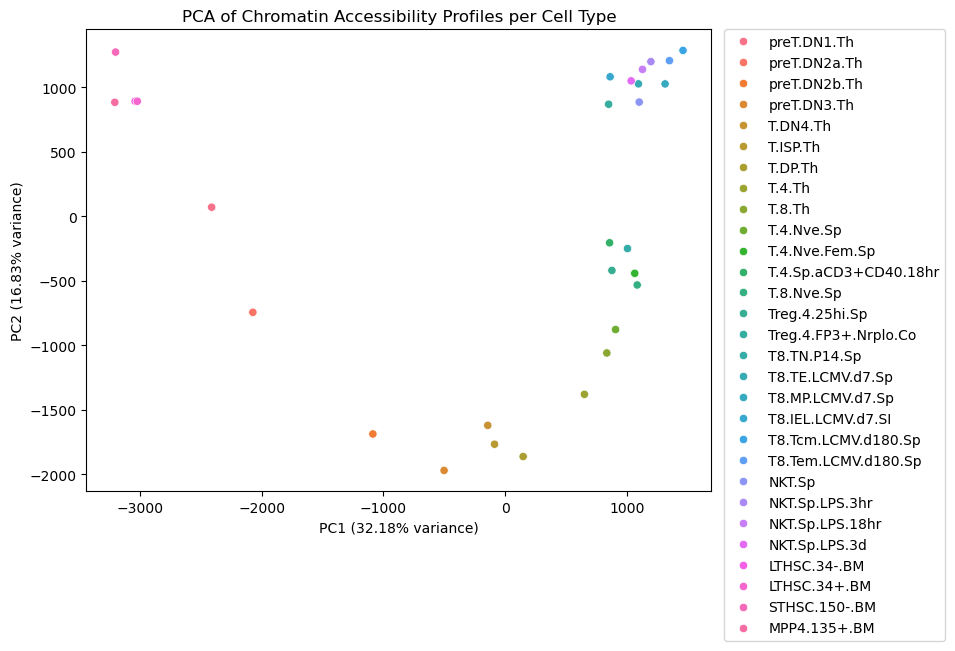

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Plotting color-coded PCA
pca_df = pca_df.reset_index().rename(columns={"index": "CellType"})

# Create a wider figure to make room for the legend
fig, ax = plt.subplots(figsize=(10, 6))  # wider than default

sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="CellType", ax=ax)

ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
ax.set_title("PCA of Chromatin Accessibility Profiles per Cell Type")

# Place legend outside plot
ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

# Shrink plot so legend fits neatly beside it
fig.subplots_adjust(right=0.75)

plt.show()

**Fig. 1: PCA of Chromatin Accessibility Profiles per Cell Type**

The separation of the cells according to their differential stage is visibile. Early T-cell stages (e. g. preT.DN1.Th etc.) are tightly grouped in the top left corner while later stages are grouped in the top right corner, suggesting chromatin remodelling as differentiation progresses. It also shows big difference in peak accessibility and analogue about the open chromatin regions. The left-to-right spread on the x-axis probably reflects the differential trajectory - so early to mature T-cells. Samples that are grouped together have similar chromatin profiles

The percentage of variance on both axis show how much of the total variability in the data is captured by each PC. Here, we define the variance as the differences in accessibility pattterns across samples. We have together 46,29% of the total variance which is pretty high so we can assume that it gives us goos approximation of the real realtionship of the cells.

The actual values on the axes are coordinates along the principal components.
The scale is interpretable: e.g., a sample at PC1 = 1000 differs more from PC1 = -1000 than from PC1 = 900.
Units reflect contribution from the original features (ATAC-seq signal intensities), though scaled and rotated.

In [6]:
import umap.umap_ as umap

# Running UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(subset)

umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"], index=subset.index)
print(umap_df.head())


c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


                 UMAP1     UMAP2
preT.DN1.Th  -3.477364  5.606886
preT.DN2a.Th -3.240939  5.108872
preT.DN2b.Th -2.719145  4.812837
preT.DN3.Th  -2.526983  4.403162
T.DN4.Th     -3.208359  4.166671


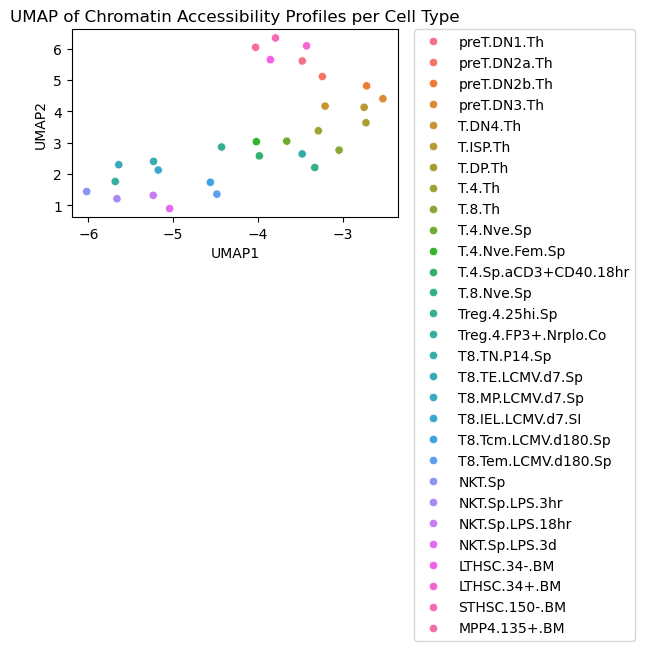

In [7]:
# Plotting color-coded UMAP
umap_df = umap_df.reset_index().rename(columns={"index": "CellType"})

sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="CellType")
plt.title("UMAP of Chromatin Accessibility Profiles per Cell Type")

# Moving legend to the side since it was overlapping 
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()  # adjusting plot to fit everything
plt.show()



**Fig. 2: UMAP of Chromatin Accessibility Profiles per Cell Type**

In this plot, the axes reflect similarity, so the closer to dots appear on the graph, the more similar their genome-wide chromatin accessibility profiles are. 

We observe grouping by cell types like preT*, T.4.*, Treg* and T8*. This grouping suggests that the chromatin accessibility profiles encode strong cell identity signals. All in all, the graph reflects progressive chromatin changes during differentiation and the different T-cell subsets are mostly well-separated.

The numbers on the axes don't have absolute meaning or units. They are relative: points closer together in UMAP space are more similar.The axes could be rotated, flipped, or stretched without changing the interpretation.

In [8]:
from sklearn.manifold import TSNE

# Running t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_result = tsne_model.fit_transform(subset)

tsne_df = pd.DataFrame(tsne_result, columns=["t-SNE1", "t-SNE2"], index=subset.index)
print(tsne_df.head())

                 t-SNE1     t-SNE2
preT.DN1.Th  -34.874287 -23.316410
preT.DN2a.Th -35.274410 -17.301741
preT.DN2b.Th -34.176876  -7.986413
preT.DN3.Th  -34.629669  -1.387986
T.DN4.Th     -27.989727   3.457356


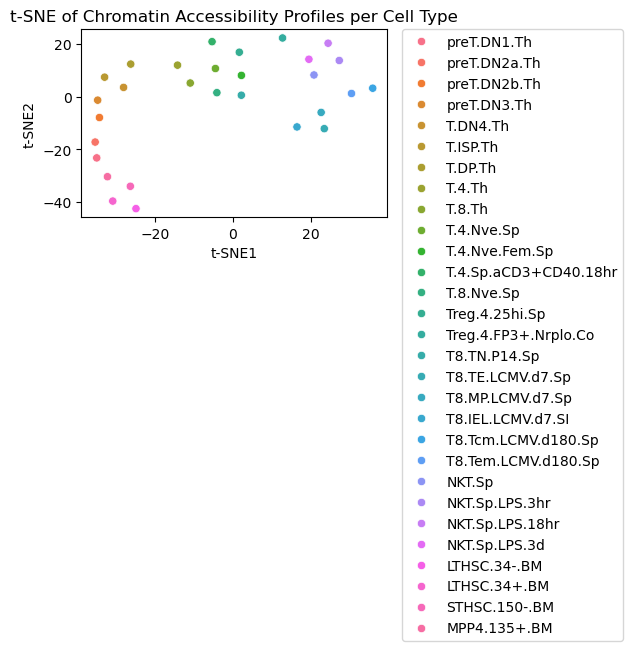

In [9]:

# Plotting color-coded t-SNE
tsne_df = tsne_df.reset_index().rename(columns={"index": "CellType"})

sns.scatterplot(data=tsne_df, x="t-SNE1", y="t-SNE2", hue="CellType")
plt.title("t-SNE of Chromatin Accessibility Profiles per Cell Type")

# Moving legend to the side since it was overlapping 
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()  # adjusting plot to fit everything

plt.show()


**Fig. 3: t-SNE of Chromatin Accessibility Profiles per Cell Type**

Again, we observe clustering by cell types, however, here the clusters appear more tight and distinct, showing a clear highly cell-type specific landscape. 

The curved structure furthermore emphasizes the relationship between early T-cell development to mature T-cell states with the chromatin landscape which is quiescent in early stages and more active in more differentiated cells. 

The graph also shows a strict separation between the progenitor cells and the mature T-cells. Additionlly, the NKT samples are well separated as well which is consistend with their differing regulatory lanscape when compared to other subtypes.

The values on the axes are purely relative — only distances matter, not actual coordinates. We cannot interpret t-SNE1 = 5 as better/worse than t-SNE1 = -5.t-SNE preserves local structure, not global — distances are reliable only within clusters.


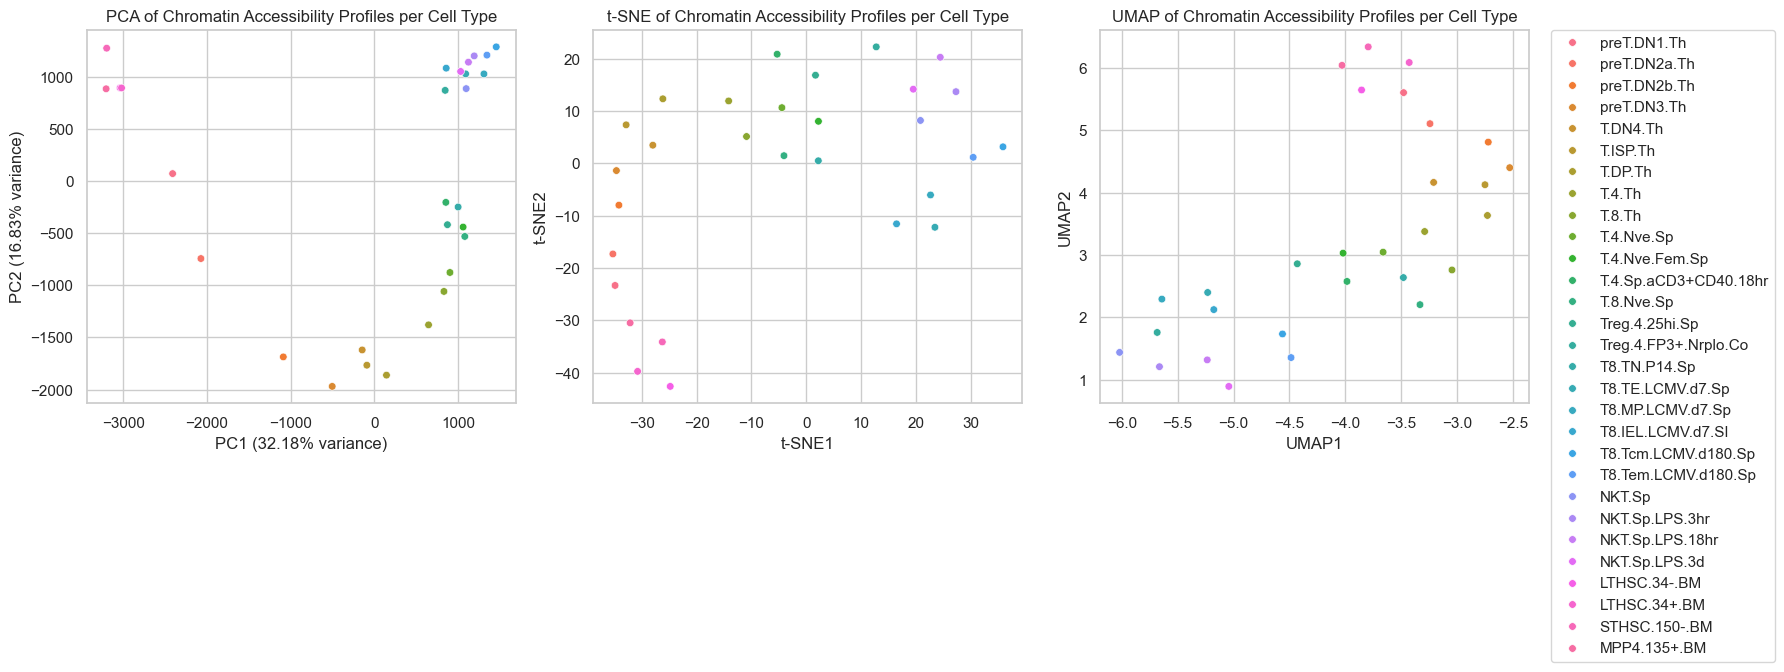

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style
sns.set(style="whitegrid")

# Creating figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 plots

# Plotting PCA
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2", hue="CellType", s=30, ax=axes[0], legend=False
)
axes[0].set_title("PCA of Chromatin Accessibility Profiles per Cell Type")
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")

# Plotting t-SNE 
sns.scatterplot(
    data=tsne_df, x="t-SNE1", y="t-SNE2", hue="CellType", s=30, ax=axes[1], legend=False
)
axes[1].set_title("t-SNE of Chromatin Accessibility Profiles per Cell Type")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

# Plotting UMAP 
sns.scatterplot(
    data=umap_df, x="UMAP1", y="UMAP2", hue="CellType", s=30, ax=axes[2]
)
axes[2].set_title("UMAP of Chromatin Accessibility Profiles per Cell Type")
axes[2].set_xlabel("UMAP1")
axes[2].set_ylabel("UMAP2")

# Moving legend to the right of the last plot
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Final layout
plt.tight_layout()
plt.show()


**Fig. 4: Comparison between the PCA, t-SNE and UMAP (from left to right) tests**

PCA, UMAP and t-SNE are shown next to each other for a comparison.


### Color-code PCA, UMAP and t-SNE according to cell groups (abT, Tact and Progenitor)

After comparing the cell types individually, we now also want to compare them according to the cell groups they correspond to - so abT, Tact and progenitor cells. We will again do PCA, UMAP and t-SNE according to those three groups only.

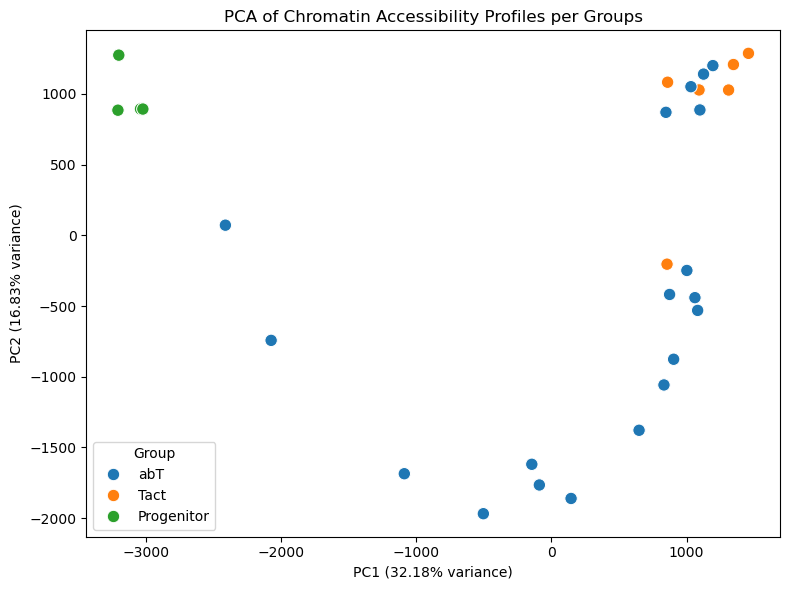

In [10]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load transposed_scaled
pca = PCA(n_components=2)
pca_result = pca.fit_transform(transposed)

# Create PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=transposed.index)

# Define cell type groups
abT_cells = [
    "preT.DN1.Th", "preT.DN2a.Th", "preT.DN2b.Th", "preT.DN3.Th", "T.DN4.Th", "T.ISP.Th", "T.DP.Th", "T.4.Th", "T.8.Th",
    "T.4.Nve.Sp", "T.4.Nve.Fem.Sp", "T.8.Nve.Sp", "Treg.4.25hi.Sp", "Treg.4.FP3+.Nrplo.Co", "T8.TN.P14.Sp", "NKT.Sp",
    "NKT.Sp.LPS.3hr", "NKT.Sp.LPS.18hr", "NKT.Sp.LPS.3d"
]

tact_cells = [
    "T.4.Sp.aCD3+CD40.18hr", "T8.TE.LCMV.d7.Sp", "T8.MP.LCMV.d7.Sp", "T8.IEL.LCMV.d7.SI",
    "T8.Tcm.LCMV.d180.Sp", "T8.Tem.LCMV.d180.Sp"
]

stem_cells = [
    "LTHSC.34-.BM", "LTHSC.34+.BM", "STHSC.150-.BM", "MPP4.135+.BM"
]

# Map cell types to groups
group_map = {}
for sample in abT_cells:
    group_map[sample] = "abT"
for sample in tact_cells:
    group_map[sample] = "Tact"
for sample in stem_cells:
    group_map[sample] = "Progenitor"

# Add group labels
pca_df["Group"] = pca_df.index.map(lambda name: group_map.get(name, "Other"))

# Plot PCA by group
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Group", s=80)
plt.title("PCA of Chromatin Accessibility Profiles per Groups")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.tight_layout()
plt.show()


**Fig. 5: PCA of Chromatin Accessibility Profiles per Groups**

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


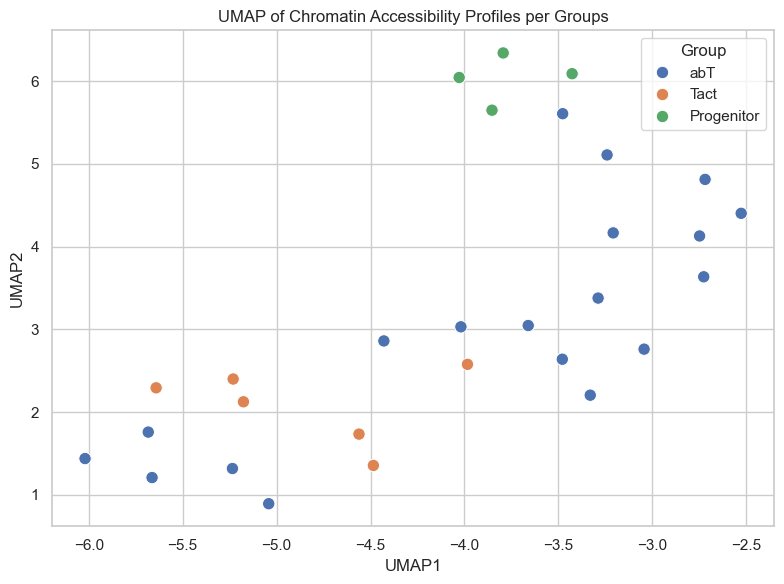

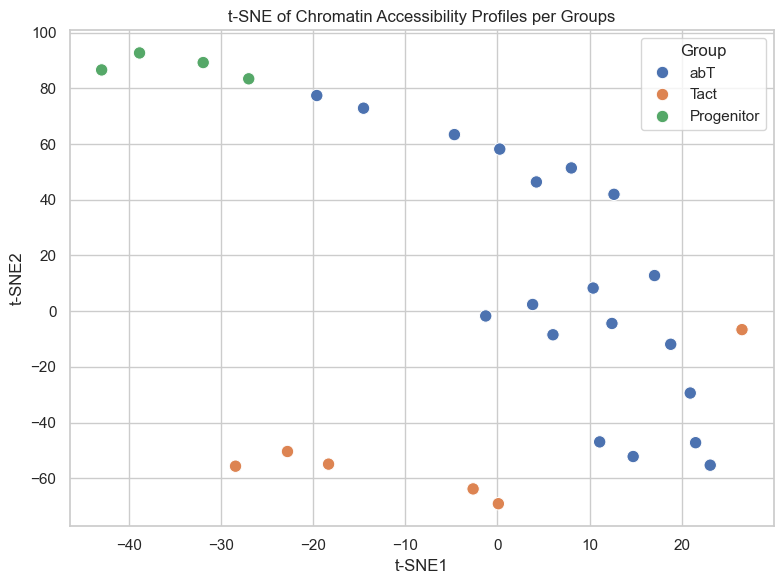

In [12]:
## For UMAP and t-SNE
# Re-running UMAP and t-SNE to assign results to umap_result and tsne_result for easier working
from umap import UMAP
from sklearn.manifold import TSNE

umap_result = UMAP(n_components=2, random_state=42).fit_transform(transposed)
tsne_result = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(transposed)

# Adding results to pca_df so that same cell type grouping can be applied
pca_df[["UMAP1", "UMAP2"]] = umap_result
pca_df[["tSNE1", "tSNE2"]] = tsne_result

# Plotting UMAP
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="UMAP1", y="UMAP2", hue="Group", s=80)
plt.title("UMAP of Chromatin Accessibility Profiles per Groups")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()
plt.show()

# Plotting t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="tSNE1", y="tSNE2", hue="Group", s=80)
plt.title("t-SNE of Chromatin Accessibility Profiles per Groups")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.tight_layout()
plt.show()


**Fig. 6: UMAP (upper graph) and t-SNE (lower graph) of Chromatin Accessibility Profiles per Groupes**

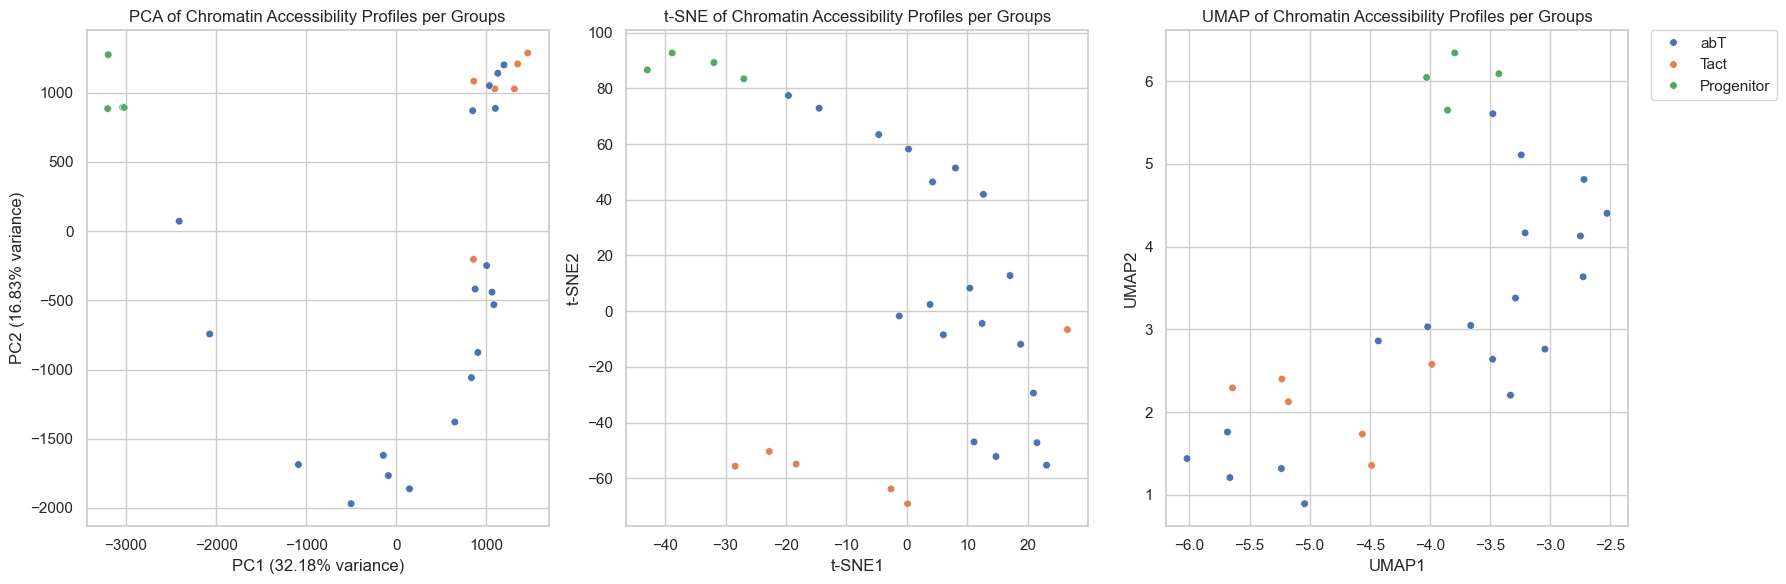

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA plot
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2", hue="Group", s=30, ax=axes[0], legend=False
)
axes[0].set_title("PCA of Chromatin Accessibility Profiles per Groups")
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")

# t-SNE plot
sns.scatterplot(
    data=pca_df, x="tSNE1", y="tSNE2", hue="Group", s=30, ax=axes[1], legend=False
)
axes[1].set_title("t-SNE of Chromatin Accessibility Profiles per Groups")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

# UMAP plot
sns.scatterplot(
    data=pca_df, x="UMAP1", y="UMAP2", hue="Group", s=30, ax=axes[2]
)
axes[2].set_title("UMAP of Chromatin Accessibility Profiles per Groups")
axes[2].set_xlabel("UMAP1")
axes[2].set_ylabel("UMAP2")

# Move legend to the right of the last plot
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Final layout adjustment
plt.tight_layout()
plt.show()


**Fig. 7: PCA, t-SNE and UMAP (from left to right) of Chromatin Accessibility Profiles per Groups for comparison**

In all 3 graphs we can clearly distinguish between the three different cellular groups (abT, Tact and progenitor cells). All progenitor and all Tact cells cluster together, respectively, while the abT cells are more spread out. This suggests that the chromatin landscapes are similar within the progenitor and the Tact cells, but differ a lot within the abT cells likely due to their heterogeneity and functional differences throughout differentiation.

## 2. Chromatin similarity matrix

**Goal**: Assess how similar or different chromatin accessibility profiles are across cell types based on ATAC-seq data.

This results will support the interpretation of PCA, UMAP and t-SNE plots with quantitative metrics. We are computing both for Pearson correlation and Euclidean distance.

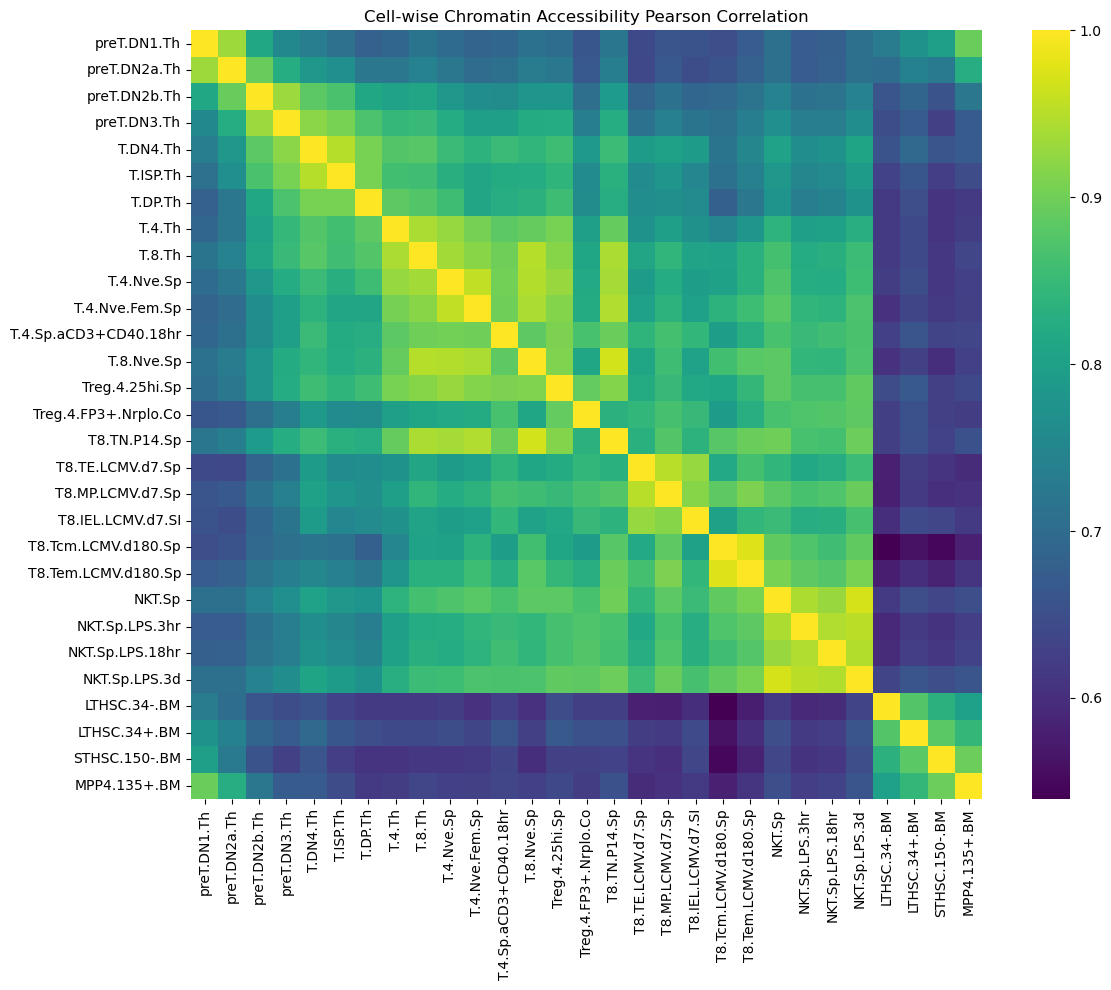

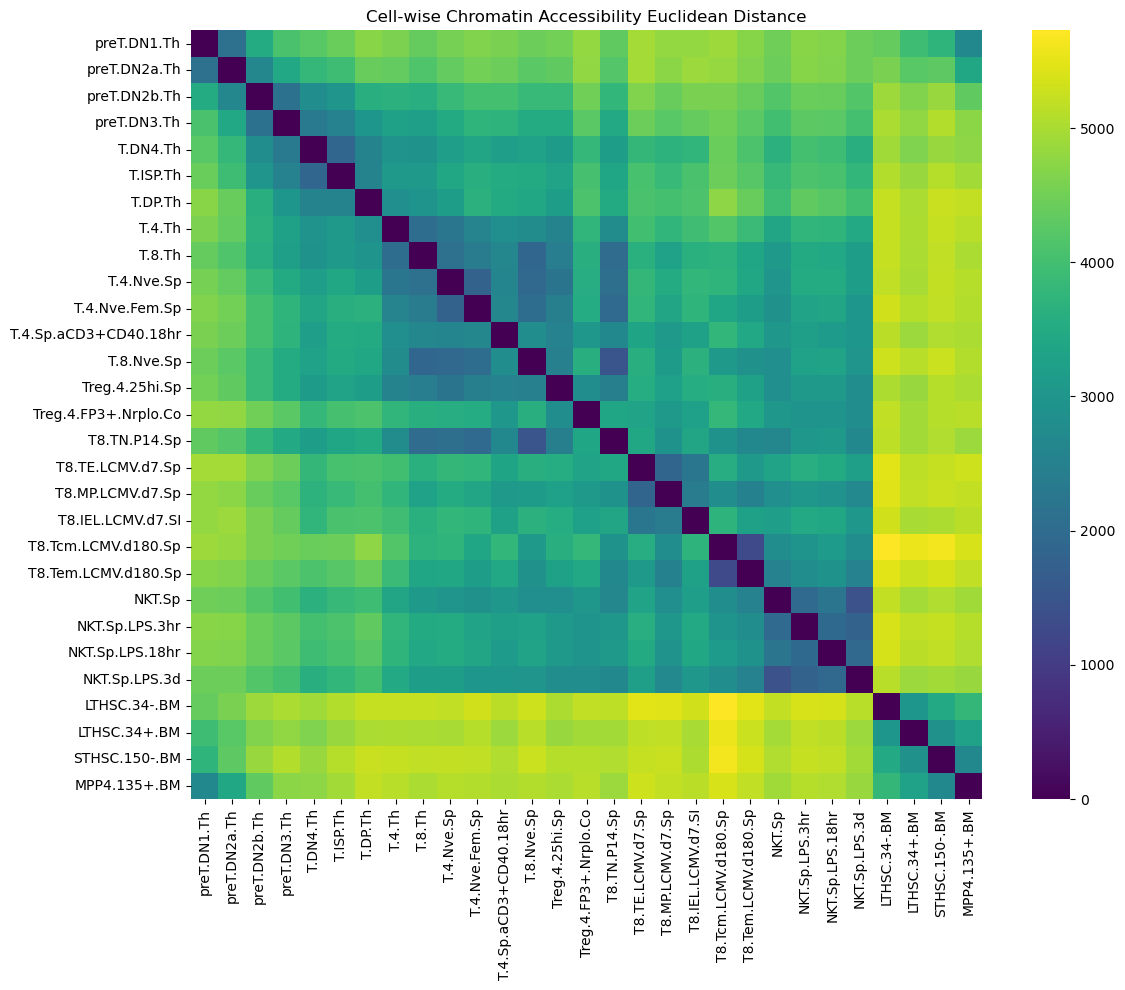

In [13]:
# Loading the matrix (again)
sample_matrix = transposed

# Computing pairwise correlation matrix (Pearson correlation between samples)
correlation_matrix = sample_matrix.T.corr()

# Computing pairwise distance matrix (Euclidean distance between rows)
from scipy.spatial.distance import pdist, squareform
import pandas as pd

distance_matrix = pd.DataFrame(
    squareform(pdist(sample_matrix, metric='euclidean')),
    index=sample_matrix.index,
    columns=sample_matrix.index
)

## Plotting heatmap with sample names 
import seaborn as sns
import matplotlib.pyplot as plt

# For correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='viridis', xticklabels=True, yticklabels=True)
plt.title("Cell-wise Chromatin Accessibility Pearson Correlation")
plt.tight_layout()
plt.show()

# For distance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(distance_matrix, cmap='viridis', xticklabels=True, yticklabels=True)
plt.title("Cell-wise Chromatin Accessibility Euclidean Distance")
plt.tight_layout()
plt.show()


**Fig. 8: Correlation (upper) and distance (lower) heatmaps of sample-wise chromatin accessibility.**

Here, we are able to see again how the different cell subtypes correlate with each other based on their chromatin landscape as per peak regions. In both heatmaps we can see a clear distinguishment for the progenitor cell types and NKT cells in comparison to the other abT and Tact cells where the difference is not so clearly visible suggesting similar chromatin landscapes between them.

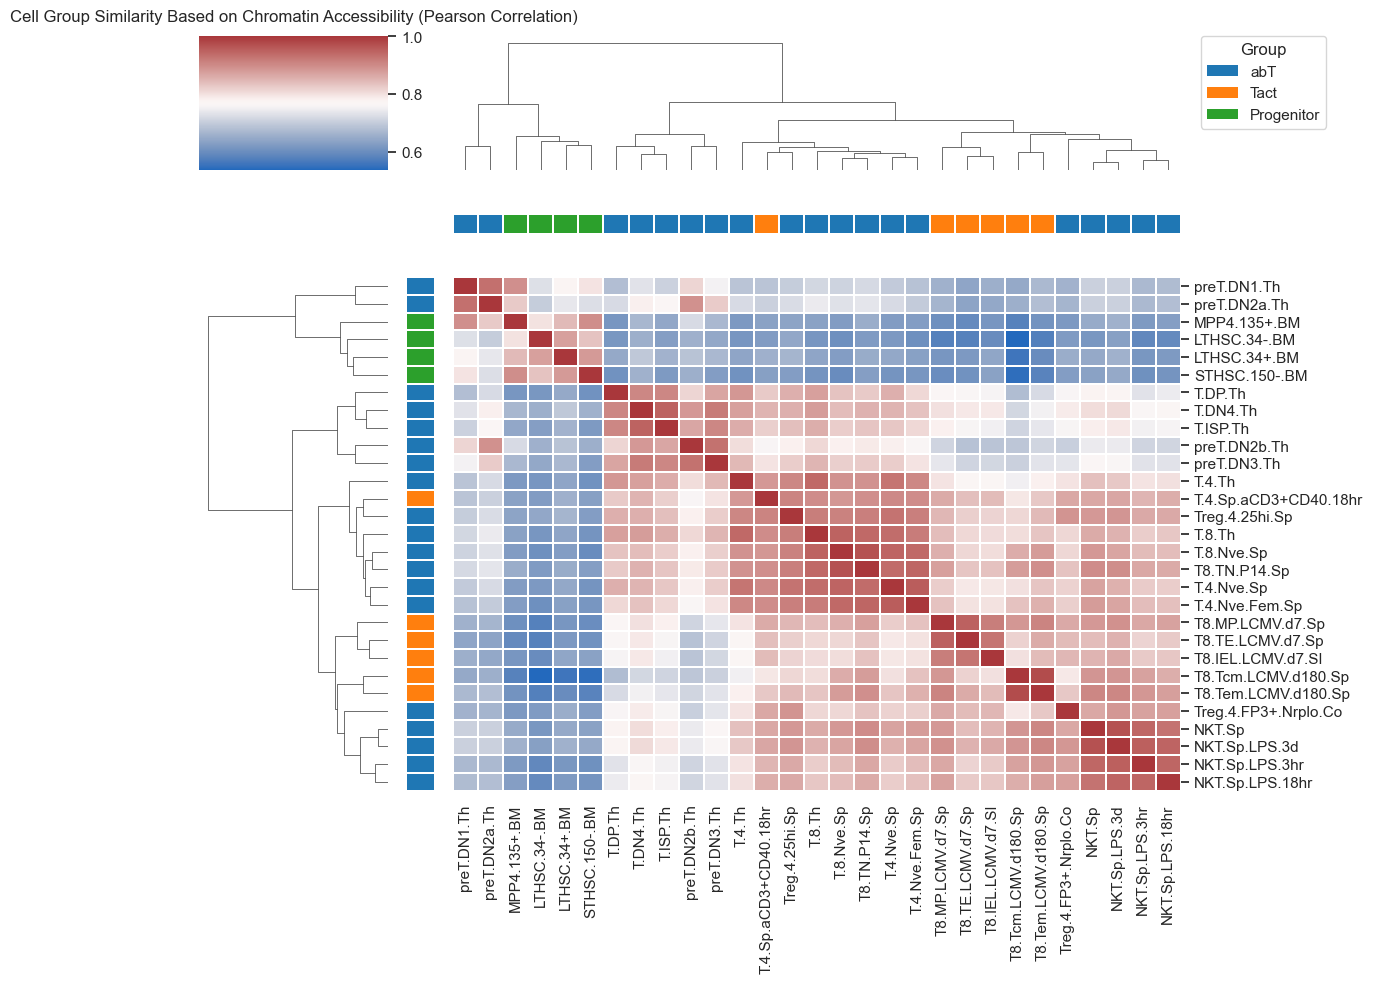

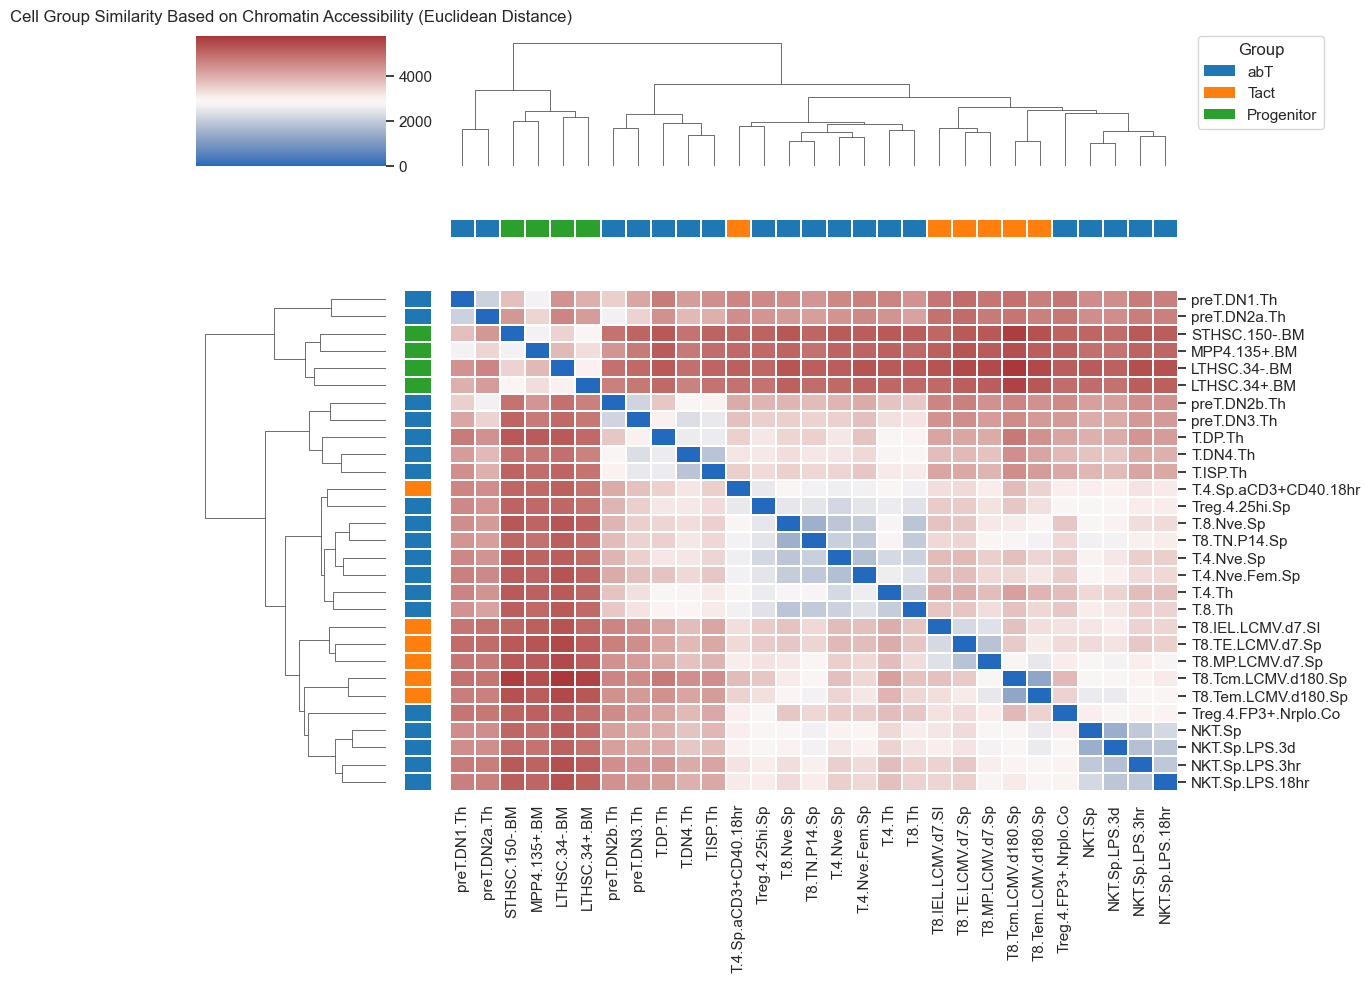

In [15]:
# Pearson Correlation and Euclidean distance matrix per cell groups (abT, Tact and progenitor)
## Preparing group mapping 
group_series = pca_df["Group"] # works because the group info is already added to the PCA DataFrame

## Creating color palette for row labels
import seaborn as sns

group_palette = {
    "abT": "#1f77b4",      # blue
    "Tact": "#ff7f0e",     # orange
    "Progenitor": "#2ca02c"  # green
}

### Creating a color list in the same order as correlation_matrix rows
correlation_matrix = correlation_matrix[correlation_matrix.index.notna()]
correlation_matrix = correlation_matrix.loc[:, correlation_matrix.columns.notna()]

row_colors_corr = correlation_matrix.index.map(group_series).map(group_palette).fillna("#cccccc")

### Create a color list in the same order as distance_matrix rows
distance_matrix = distance_matrix[distance_matrix.index.notna()]
distance_matrix = distance_matrix.loc[:, correlation_matrix.columns.notna()]
row_colors_dist = distance_matrix.index.map(group_series).map(group_palette).fillna("#cccccc")

## Plotting heatmap with colored labels
import seaborn as sns
import matplotlib.pyplot as plt

### For correlation_matrix
sns.set(style="white")
g = sns.clustermap(
    correlation_matrix,
    row_colors=row_colors_corr,
    col_colors=row_colors_corr,
    figsize=(12, 10),
    cmap="vlag",  
    linewidths=0.1
)

for label in group_palette:
    g.ax_col_dendrogram.bar(0, 0, color=group_palette[label], label=label, linewidth=0)
g.ax_col_dendrogram.legend(
    loc="upper right", bbox_to_anchor=(1.2, 1), borderaxespad=0, title="Group"
)


plt.title("Cell Group Similarity Based on Chromatin Accessibility (Pearson Correlation)", y=1.05)
plt.tight_layout()
plt.show()

### For distance_matrix
sns.set(style="white")
g = sns.clustermap(
    distance_matrix,
    row_colors=row_colors_dist,
    col_colors=row_colors_dist,
    figsize=(12, 10),
    cmap="vlag",
    linewidths=0.1
)

for label in group_palette:
    g.ax_col_dendrogram.bar(0, 0, color=group_palette[label], label=label, linewidth=0)
g.ax_col_dendrogram.legend(
    loc="upper right", bbox_to_anchor=(1.2, 1), borderaxespad=0, title="Group"
)

plt.title("Cell Group Similarity Based on Chromatin Accessibility (Euclidean Distance)", y=1.05)
plt.tight_layout()
plt.show()



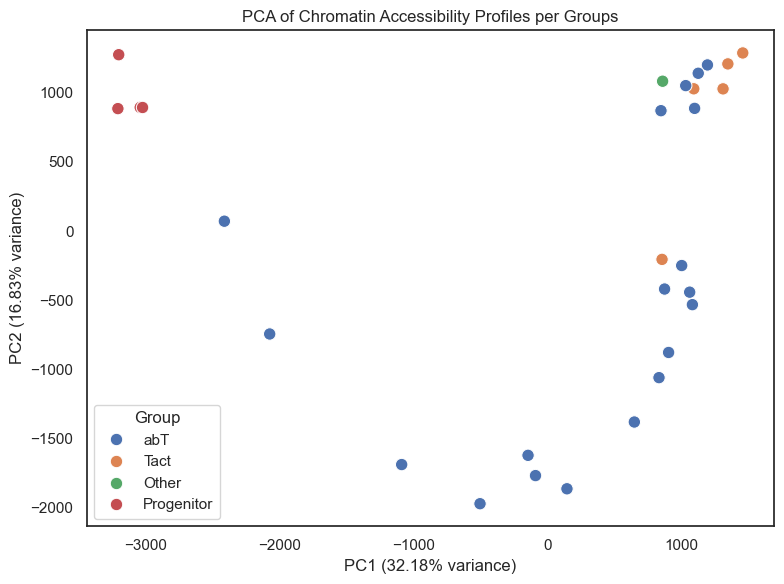

In [16]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load transposed_scaled
pca = PCA(n_components=2)
pca_result = pca.fit_transform(transposed)

# Create PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=transposed.index)

# Define cell type groups
abT_cells = [
    "preT.DN1.Th", "preT.DN2a.Th", "preT.DN2b.Th", "preT.DN3.Th", "T.DN4.Th", "T.ISP.Th", "T.DP.Th", "T.4.Th", "T.8.Th",
    "T.4.Nve.Sp", "T.4.Nve.Fem.Sp", "T.8.Nve.Sp", "Treg.4.25hi.Sp", "Treg.4.FP3+.Nrplo.Co", "T8.TN.P14.Sp", "NKT.Sp",
    "NKT.Sp.LPS.3hr", "NKT.Sp.LPS.18hr", "NKT.Sp.LPS.3d"
]

tact_cells = [
    "T.4.Sp.aCD3+CD40.18hr", "T8.TE.LCMV.d7.Sp", "T8.MP.LCMV.d7.Sp", "T8.IEL.LCMV.d7.Gut",
    "T8.Tcm.LCMV.d180.Sp", "T8.Tem.LCMV.d180.Sp"
]

stem_cells = [
    "LTHSC.34-.BM", "LTHSC.34+.BM", "STHSC.150-.BM", "MPP4.135+.BM"
]

# Map cell types to groups
group_map = {}
for sample in abT_cells:
    group_map[sample] = "abT"
for sample in tact_cells:
    group_map[sample] = "Tact"
for sample in stem_cells:
    group_map[sample] = "Progenitor"

# Add group labels
pca_df["Group"] = pca_df.index.map(lambda name: group_map.get(name, "Other"))

# Plot PCA by group
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Group", s=80)
plt.title("PCA of Chromatin Accessibility Profiles per Groups")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.tight_layout()
plt.show()


**Fig. 9: Pearson Correlation (upper) and Euclidean distance (lower) heatmaps for cell group similarity based chromatin accessibility profiles**

The differences and similarities between the cells is more visible in Fig. 8, but the trend is visualised in Fig. 9 as well. The correlation heatmap does not show much since the colors are too equal, but the distance heatmaps does give us some information on how the three big cell groups cluster between eacht other.

## 3. Peak Clustering

### K-means clustering on cell types

Now, we want to explore further how the ATAC-seq peaks cluster between each other using k-means clustering. We are going to plot the results using PCA, UMAP and t-SNE.

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kalin_p\miniconda3\

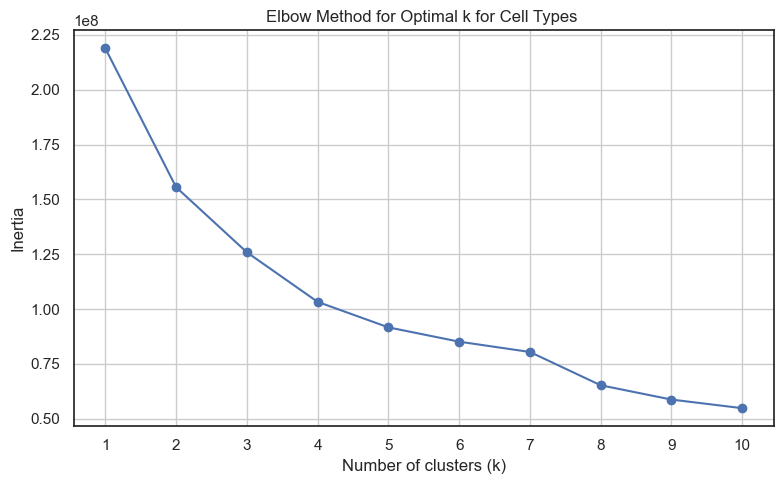

In [17]:
# Running elbow method for k-means clustering on cell types
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Loading matrix: samples × peaks
df = transposed

# Computing inertias for k 
inertias = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(df.values)
    inertias.append(km.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.xticks(K_range)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k for Cell Types ")
plt.grid(True)
plt.tight_layout()
plt.show()


**Fig. 10: Elbow method for optimal number of clusters for cell types.**

The elbow method plot suggests that the optimal number of clusters lies by k = 4. This makes sense when looking at the heatmaps above since there 4 groups can be distinguished - abT, Tact, NKT and progenitor cells. Now, we will run k-means clustering and plot it as PCA, UMAP and t-SNE plots.

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


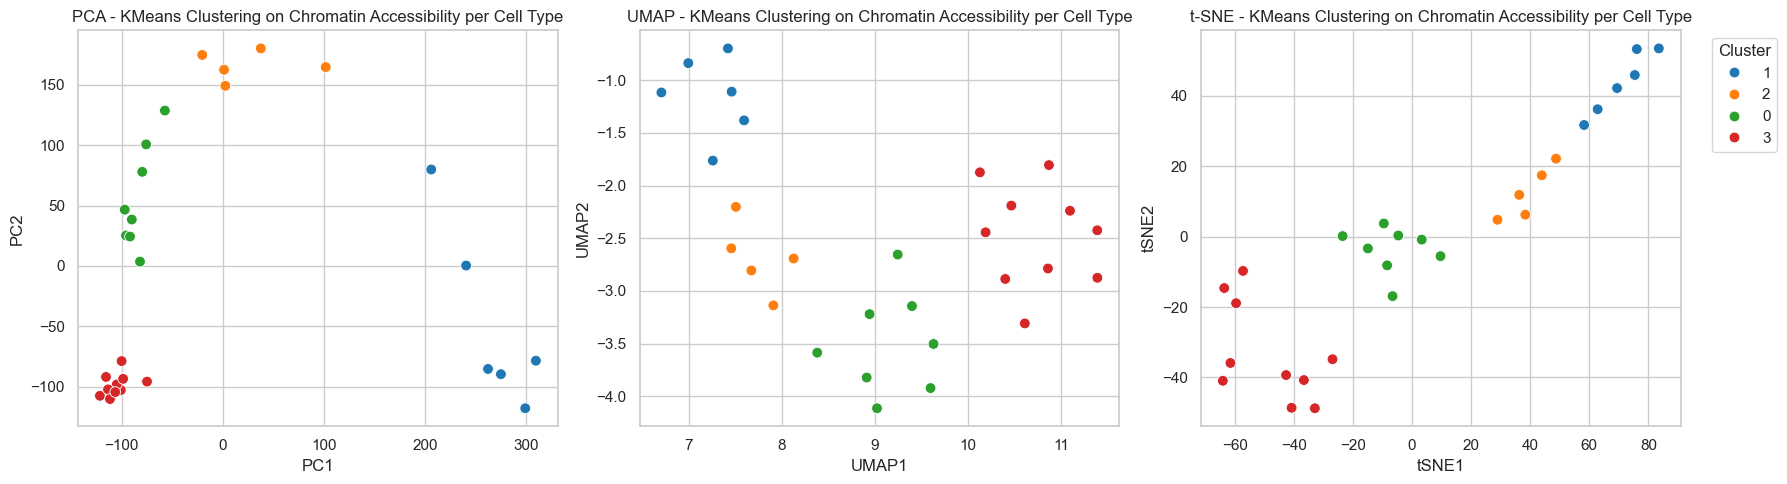

In [6]:
# Running k-means clustering on cell types 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP


# Loading dataset
df = transposed

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(df.values)

# K-Means clustering (k=4) 
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X)

# Re-grouping cell subtypes into bigger cellular families
abT_cells = ["preT.DN1.Th", "preT.DN2a.Th", "preT.DN2b.Th", "preT.DN3.Th",
    "T.DN4.Th", "T.ISP.Th", "T.DP.Th","T.4.Th", "T.8.Th",
    "T.4.Nve.Sp", "T.4.Nve.Fem.Sp", "T.8.Nve.Sp",
    "Treg.4.25hi.Sp", "Treg.4.FP3+.Nrplo.Co",
    "T8.TN.P14.Sp"]

NKT_cells = ["NKT.Sp", "NKT.Sp.LPS.3hr", "NKT.Sp.LPS.18hr", "NKT.Sp.LPS.3d"]

tact_cells = ["T.4.Sp.aCD3+CD40.18hr",
    "T8.TE.LCMV.d7.Sp",
    "T8.MP.LCMV.d7.Sp",
    "T8.IEL.LCMV.d7.SI",
    "T8.Tcm.LCMV.d180.Sp",
    "T8.Tem.LCMV.d180.Sp"]

stem_cells = [ "LTHSC.34-.BM", "LTHSC.34+.BM",
    "STHSC.150-.BM", "MPP4.135+.BM"]

# Mapping each cell to its group
group_map = {}

for sample in abT_cells:
    group_map[sample] = "abT"
for sample in NKT_cells:
    group_map[sample] = "NKT"
for sample in tact_cells:
    group_map[sample] = "Tact"
for sample in stem_cells:
    group_map[sample] = "Progenitor"


# Building  a results DataFrame
results = pd.DataFrame(index=df.index)
results["Cluster"] = labels.astype(str)
results["Group"]   = results.index.map(lambda s: group_map.get(s, "Other"))

# Dimensionality reduction 
# PCA
pca = PCA(n_components=2, random_state=42)
coords_pca = pca.fit_transform(X)
results["PC1"], results["PC2"] = coords_pca[:, 0], coords_pca[:, 1]

# UMAP
umap = UMAP(n_components=2, random_state=42)
coords_umap = umap.fit_transform(X)
results["UMAP1"], results["UMAP2"] = coords_umap[:, 0], coords_umap[:, 1]

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
coords_tsne = tsne.fit_transform(X)
results["tSNE1"], results["tSNE2"] = coords_tsne[:, 0], coords_tsne[:, 1]

# Plotting side-by-side 
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(
    data=results, x="PC1", y="PC2",
    hue="Cluster", palette="tab10", s=60, ax=axes[0]
)
axes[0].set_title("PCA - KMeans Clustering on Chromatin Accessibility per Cell Type")

sns.scatterplot(
    data=results, x="UMAP1", y="UMAP2",
    hue="Cluster", palette="tab10", s=60, ax=axes[1]
)
axes[1].set_title("UMAP - KMeans Clustering on Chromatin Accessibility per Cell Type")

sns.scatterplot(
    data=results, x="tSNE1", y="tSNE2",
    hue="Cluster", palette="tab10", s=60, ax=axes[2]
)
axes[2].set_title("t-SNE - KMeans Clustering on Chromatin Accessibility per Cell Type")

# Clean up legends
for ax in axes:
    ax.legend_.remove()
axes[2].legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Fig. 11: K-means clustering plotted as PCA, UMAP, t-SNE.**

The four clusters are visible here, to see which cells are part of which cluster, we will now cross-tabulate Cluster vs Group.

In [7]:
# Adding biological Group into results
results["Group"] = results.index.map(lambda s: group_map.get(s, "Other"))

# Cross-tabulate Cluster vs Group
ct = pd.crosstab(
    results["Cluster"],
    results["Group"],
    rownames=["KMeans Cluster"],
    colnames=["Biological Group"]
)
print(ct)


Biological Group  NKT  Progenitor  Tact  abT
KMeans Cluster                              
0                   0           0     1    7
1                   0           4     0    2
2                   0           0     0    5
3                   4           0     5    1


In [8]:
for cl, grp in results.groupby("Cluster"):
    cells = grp.index.tolist()
    print(f"Cluster {cl} ({len(cells)} cells):")
    print("  ", ", ".join(cells))
    print()


Cluster 0 (8 cells):
   T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve.Fem.Sp, T.4.Sp.aCD3+CD40.18hr, T.8.Nve.Sp, Treg.4.25hi.Sp, T8.TN.P14.Sp

Cluster 1 (6 cells):
   preT.DN1.Th, preT.DN2a.Th, LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MPP4.135+.BM

Cluster 2 (5 cells):
   preT.DN2b.Th, preT.DN3.Th, T.DN4.Th, T.ISP.Th, T.DP.Th

Cluster 3 (10 cells):
   Treg.4.FP3+.Nrplo.Co, T8.TE.LCMV.d7.Sp, T8.MP.LCMV.d7.Sp, T8.IEL.LCMV.d7.SI, T8.Tcm.LCMV.d180.Sp, T8.Tem.LCMV.d180.Sp, NKT.Sp, NKT.Sp.LPS.3hr, NKT.Sp.LPS.18hr, NKT.Sp.LPS.3d



In [9]:
for cl, grp in results.groupby("Cluster"):
    print(f"Cluster {cl} ({len(grp)} cells):")
    for cell, row in grp.iterrows():
        print(f"  • {cell}: group = {row['Group']}")
    print()


Cluster 0 (8 cells):
  • T.4.Th: group = abT
  • T.8.Th: group = abT
  • T.4.Nve.Sp: group = abT
  • T.4.Nve.Fem.Sp: group = abT
  • T.4.Sp.aCD3+CD40.18hr: group = Tact
  • T.8.Nve.Sp: group = abT
  • Treg.4.25hi.Sp: group = abT
  • T8.TN.P14.Sp: group = abT

Cluster 1 (6 cells):
  • preT.DN1.Th: group = abT
  • preT.DN2a.Th: group = abT
  • LTHSC.34-.BM: group = Progenitor
  • LTHSC.34+.BM: group = Progenitor
  • STHSC.150-.BM: group = Progenitor
  • MPP4.135+.BM: group = Progenitor

Cluster 2 (5 cells):
  • preT.DN2b.Th: group = abT
  • preT.DN3.Th: group = abT
  • T.DN4.Th: group = abT
  • T.ISP.Th: group = abT
  • T.DP.Th: group = abT

Cluster 3 (10 cells):
  • Treg.4.FP3+.Nrplo.Co: group = abT
  • T8.TE.LCMV.d7.Sp: group = Tact
  • T8.MP.LCMV.d7.Sp: group = Tact
  • T8.IEL.LCMV.d7.SI: group = Tact
  • T8.Tcm.LCMV.d180.Sp: group = Tact
  • T8.Tem.LCMV.d180.Sp: group = Tact
  • NKT.Sp: group = NKT
  • NKT.Sp.LPS.3hr: group = NKT
  • NKT.Sp.LPS.18hr: group = NKT
  • NKT.Sp.LPS.3d: gr

### K-means clustering on peaks

Having done that, we now want to do the same analysis, but on the peaks. So we have transpose the matrix back to peaks as rows and samples as columns and run the clustering again. However, we need to run the elbow method plot again first to determine the optimal number of clusters here as well.

In [20]:
signal_matrix.head()

,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0,14.81,22.31,5.17,2.00,3.54,5.53,1.99,1.42,1.52,4.37,...,2.76,5.94,0.98,2.75,2.85,1.49,0.41,2.57,3.52,7.89
1,59.36,43.17,50.58,28.94,4.62,3.33,1.09,1.76,3.20,1.89,...,2.66,4.29,1.16,1.54,1.19,2.18,9.93,8.79,16.02,47.78
2,40.73,28.06,12.60,30.46,14.85,13.72,2.33,24.05,20.89,19.84,...,58.49,41.12,25.50,18.36,16.14,19.20,36.48,28.99,26.03,33.68
3,23.05,8.10,8.83,13.55,8.17,7.60,4.62,12.30,8.91,13.70,...,28.85,23.94,12.37,9.06,10.64,9.17,16.15,16.66,17.12,17.28
4,20.15,7.29,2.67,3.08,2.89,1.54,2.49,0.11,0.53,1.25,...,2.60,1.07,7.23,3.46,1.20,5.36,0.41,0.71,2.69,5.80


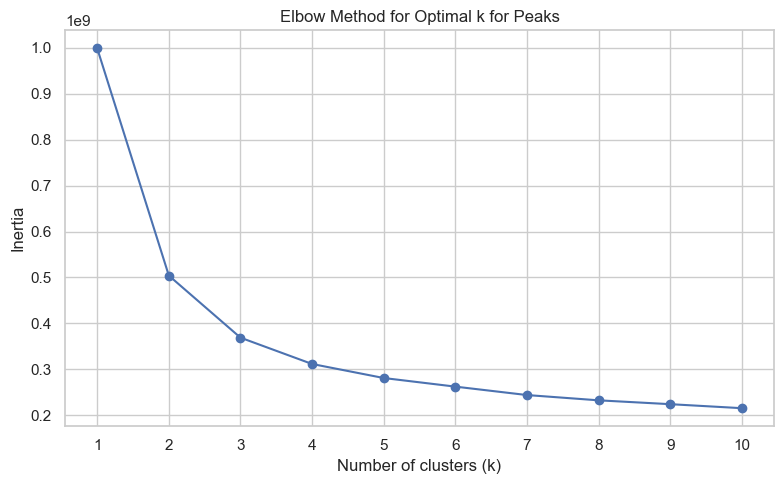

In [21]:
# Running elbow method for k-means clustering on peaks
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Loading matrix: samples × peaks
df = signal_matrix

# Computing inertias for k 
inertias = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(df.values)
    inertias.append(km.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.xticks(K_range)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k for Peaks")
plt.grid(True)
plt.tight_layout()
plt.show()

**Fig. 12: Elbow method to determine optimal number of clusters on peaks.**

The plot shows that the optimal number of clusters here is k = 3. Now, we will run k-means clustering with k = 3 on the peaks.

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


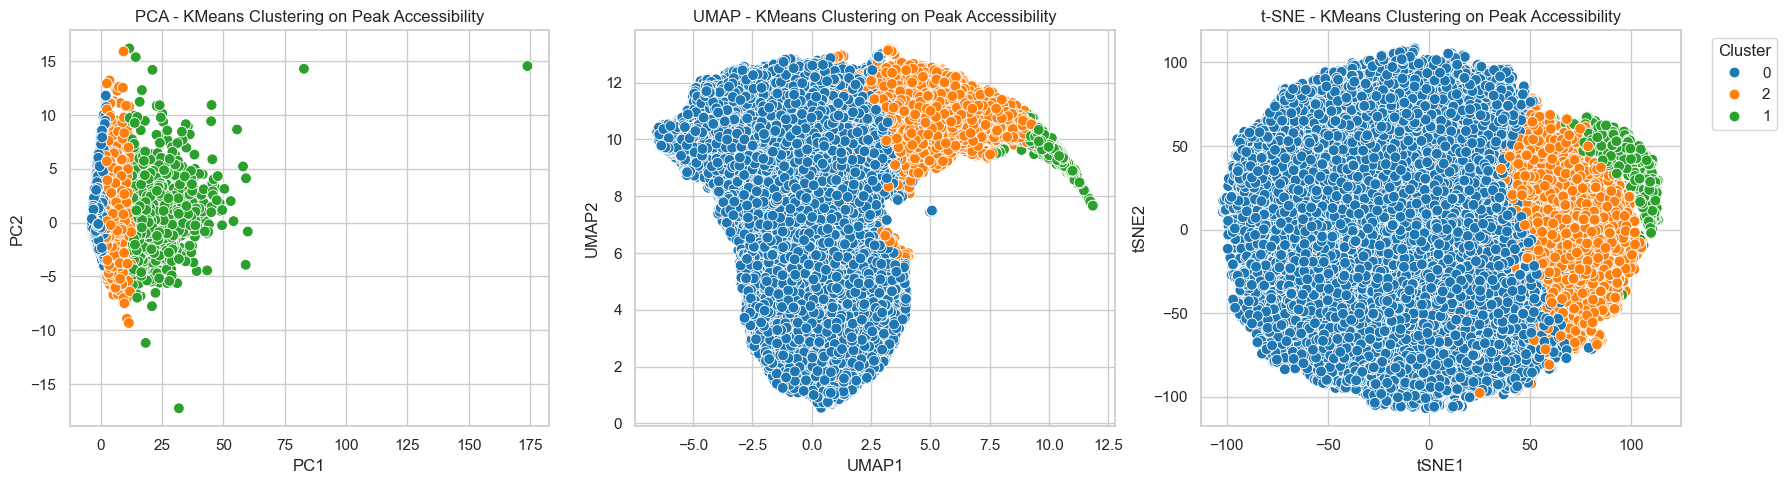

In [22]:
# Running k-means clustering on peaks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP


# Loading dataset
df = signal_matrix

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(df.values)

# K-Means clustering (k=3) 
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X)

# Building  a results DataFrame
results = pd.DataFrame(index=df.index)
results["Cluster"] = labels.astype(str)

# Dimensionality reduction 
# PCA
pca = PCA(n_components=2, random_state=42)
coords_pca = pca.fit_transform(X)
results["PC1"], results["PC2"] = coords_pca[:, 0], coords_pca[:, 1]

# UMAP
umap = UMAP(n_components=2, random_state=42)
coords_umap = umap.fit_transform(X)
results["UMAP1"], results["UMAP2"] = coords_umap[:, 0], coords_umap[:, 1]

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
coords_tsne = tsne.fit_transform(X)
results["tSNE1"], results["tSNE2"] = coords_tsne[:, 0], coords_tsne[:, 1]

# Plotting side-by-side 
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(
    data=results, x="PC1", y="PC2",
    hue="Cluster", palette="tab10", s=60, ax=axes[0]
)
axes[0].set_title("PCA - KMeans Clustering on Peak Accessibility")

sns.scatterplot(
    data=results, x="UMAP1", y="UMAP2",
    hue="Cluster", palette="tab10", s=60, ax=axes[1]
)
axes[1].set_title("UMAP - KMeans Clustering on Peak Accessibility")

sns.scatterplot(
    data=results, x="tSNE1", y="tSNE2",
    hue="Cluster", palette="tab10", s=60, ax=axes[2]
)
axes[2].set_title("t-SNE - KMeans Clustering on Peak Accessibility")

# Clean up legends
for ax in axes:
    ax.legend_.remove()
axes[2].legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Fig. 13: K-means clustering on peaks plotted as PCA, UMAP and t-SNE**



## 4. Does CRE clustering change when considering effect direction?

We are going to use the regression results that give us insight into the specific CRE effect direction (activating or repressing enhancers) and cluster them again so that we can draw conclusions on how much the effect direction changes the peak accessibility landscape.

In [4]:
# Load all CRE dataframe for ATAC-seq
peak_matrix.head()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,preT.DN1.Th,preT.DN2a.Th,...,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,variance
0,ImmGenATAC1219.peak_69,chr1,4468579,0.00,7.11,1.0,NaN,"Rp1,Sox17",14.81,22.31,...,5.94,0.98,2.75,2.85,1.49,0.41,2.57,3.52,7.89,21.404348
1,ImmGenATAC1219.peak_77,chr1,4490652,0.08,16.20,1.0,NaN,"Rp1,Sox17",59.36,43.17,...,4.29,1.16,1.54,1.19,2.18,9.93,8.79,16.02,47.78,297.171420
2,ImmGenATAC1219.peak_83,chr1,4496479,0.40,23.81,1.0,NaN,"Rp1,Sox17",40.73,28.06,...,41.12,25.50,18.36,16.14,19.20,36.48,28.99,26.03,33.68,182.666600
3,ImmGenATAC1219.peak_84,chr1,4496738,0.14,11.15,1.0,NaN,"Rp1,Sox17",23.05,8.10,...,23.94,12.37,9.06,10.64,9.17,16.15,16.66,17.12,17.28,42.240147
4,ImmGenATAC1219.peak_93,chr1,4547574,0.14,41.55,1.0,NaN,Sox17,20.15,7.29,...,1.07,7.23,3.46,1.20,5.36,0.41,0.71,2.69,5.80,16.024600


In [ ]:
# Select unuseful columns
to_drop = [
    "Summit",
    "mm10.60way.phastCons_scores",
    "_-log10_bestPvalue",
    "Included.in.systematic.analysis",
    "TSS",
    "genes.within.100Kb",
    "variance"
]

# Drop them
peak_matrix_all = peak_matrix.drop(columns=to_drop)
peak_matrix_all.head()

,ImmGenATAC1219.peakID,chrom,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0,ImmGenATAC1219.peak_69,chr1,14.81,22.31,5.17,2.00,3.54,5.53,1.99,1.42,...,2.76,5.94,0.98,2.75,2.85,1.49,0.41,2.57,3.52,7.89
1,ImmGenATAC1219.peak_77,chr1,59.36,43.17,50.58,28.94,4.62,3.33,1.09,1.76,...,2.66,4.29,1.16,1.54,1.19,2.18,9.93,8.79,16.02,47.78
2,ImmGenATAC1219.peak_83,chr1,40.73,28.06,12.60,30.46,14.85,13.72,2.33,24.05,...,58.49,41.12,25.50,18.36,16.14,19.20,36.48,28.99,26.03,33.68
3,ImmGenATAC1219.peak_84,chr1,23.05,8.10,8.83,13.55,8.17,7.60,4.62,12.30,...,28.85,23.94,12.37,9.06,10.64,9.17,16.15,16.66,17.12,17.28
4,ImmGenATAC1219.peak_93,chr1,20.15,7.29,2.67,3.08,2.89,1.54,2.49,0.11,...,2.60,1.07,7.23,3.46,1.20,5.36,0.41,0.71,2.69,5.80


Now we will join with the results from the regression.

In [9]:
import pandas as pd
import numpy as np

# Load regression
reg = pd.read_csv("high_conf_filtered.csv")

# Rename for the join
peak_matrix_all = peak_matrix_all.rename(columns={"ImmGenATAC1219.peakID":"peak_ID"})

# Merge (drops peaks not present in regression)
all_CREs = (
    peak_matrix_all
    .merge(reg[["peak_ID","coefficient"]], on="peak_ID", how="inner")
)

# Classify each CRE
conds = [
    all_CREs["coefficient"]  >  0,
    all_CREs["coefficient"]  <  0,
    all_CREs["coefficient"] ==  0,
]
choices = ["activating", "repressing", "neutral"]

all_CREs["Type"] = np.select(conds, choices, default="neutral")

# Map to direction multipliers
all_CREs["direction"] = all_CREs["Type"].map({
    "activating":  1,
    "repressing": -1,
    "neutral":     0
})


We are checking what the all_CREs data looks like and computing the means between the peaks for every cell.

In [ ]:
# List all columns that represent ATAC means per cell type:
cell_type_cols = [
    c for c in all_CREs.columns
    if c not in ["peak_ID","chrom","coefficient","Type","direction"]
]

print("Detected cell‐type columns:", cell_type_cols)
print("\nData types:")
print(all_CREs[cell_type_cols].dtypes)

# Print the first few values:
print("\nSample ATAC means per CRE:")
print(all_CREs[cell_type_cols].head())

# Compute mean accessibility across all CREs for each cell type:
per_cell_mean = all_CREs[cell_type_cols].mean(axis=0)
print("\nMean accessibility per cell type (across CREs):")
print(per_cell_mean)

Detected cell‐type columns: ['preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM']

Data types:
preT.DN1.Th              float64
preT.DN2a.Th             float64
preT.DN2b.Th             float64
preT.DN3.Th              float64
T.DN4.Th                 float64
T.ISP.Th                 float64
T.DP.Th                  float64
T.4.Th                   float64
T.8.Th                   float64
T.4.Nve.Sp               float64
T.4.Nve.Fem.Sp           float64
T.4.Sp.aCD3+CD40.18hr    float64
T.8.Nve.Sp               float64
Treg.4.25hi.Sp           float64
Treg.4.FP3+.Nr

We will now build a directional and a non-directional matrix. The directional considering the effect direction, the non-directional being only ATAC.

In [11]:
# Identify the 29 ATAC‐mean columns
cell_cols = [
    c for c in all_CREs.columns
    if c not in ["peak_ID","chrom","coefficient","Type","direction"]
]

# Non‐directional matrix: just the raw ATAC means
X_nondir = all_CREs[cell_cols].values   

# Directional matrix: flip by ±1 according to'direction' column
# This multiplies each row by +1 (activator), –1 (repressor), or 0 (neutral)
X_dir = (all_CREs[cell_cols]
           .multiply(all_CREs["direction"], axis=0)
           .values)


We want to plot them using hierarchical clustering (ward).

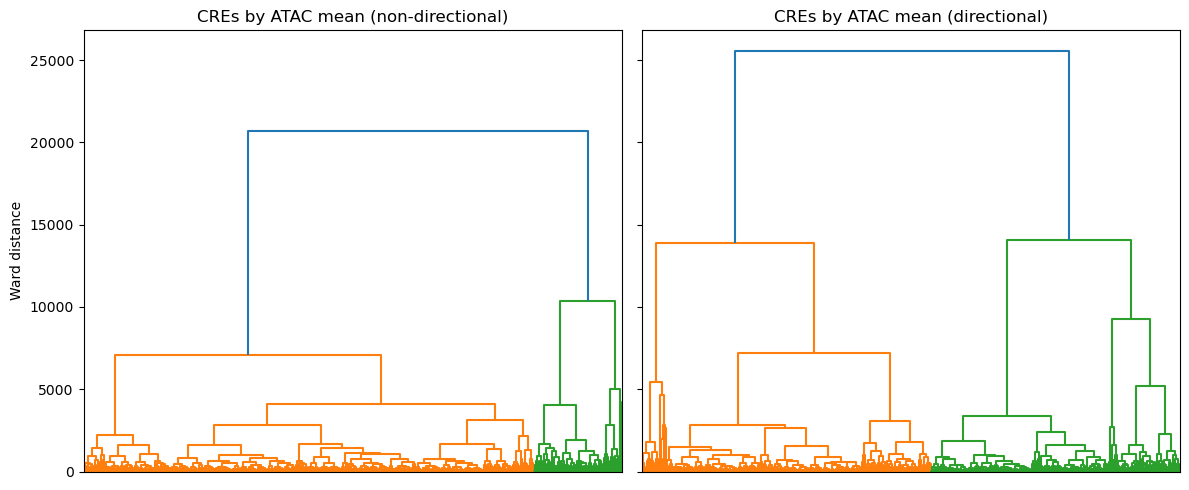

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Linkage on non‐directional
link_nondir = linkage(X_nondir, method="ward")

# Linkage on directional
link_dir    = linkage(X_dir,    method="ward")

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), sharey=True)

dendrogram(link_nondir, no_labels=True, ax=ax1)
ax1.set_title("CREs by ATAC mean (non-directional)")
ax1.set_ylabel("Ward distance")

dendrogram(link_dir, no_labels=True, ax=ax2)
ax2.set_title("CREs by ATAC mean (directional)")

plt.tight_layout()
plt.show()

**Fig. 14: Comparison dendograms of CREs by ATAC mean (non-directional) and CREs by ATAC mean (directional)**

We need to choose a cut-off height to be able to compare further. Based on previous results using the Elbow method to determine optimal number of clusters, we are going to go with k=5.

Adjusted Rand Index: 0.249


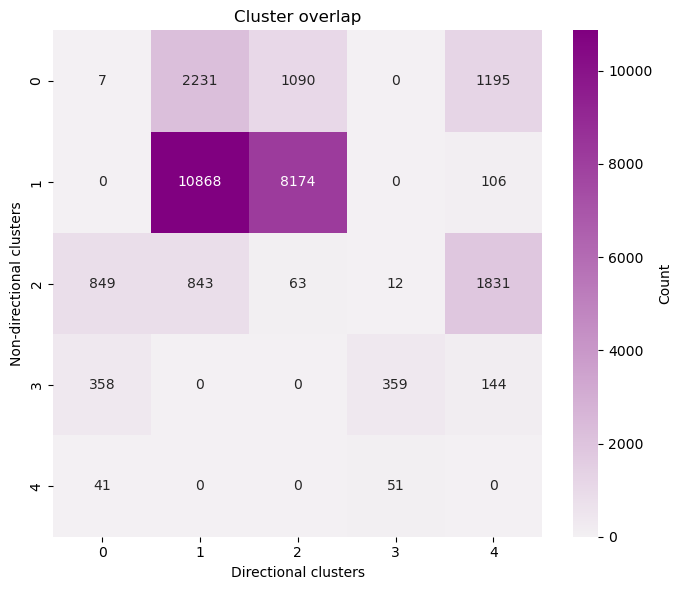

In [26]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import adjusted_rand_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# choose number of clusters
k = 5

# cut your two dendrograms into k flat clusters
labels_n = fcluster(link_nondir, k, criterion="maxclust")
labels_d = fcluster(link_dir,    k, criterion="maxclust")

# compute ARI
ari = adjusted_rand_score(labels_n, labels_d)
print(f"Adjusted Rand Index: {ari:.3f}")

# build confusion matrix
cm = confusion_matrix(labels_n, labels_d)

# plot heatmap with a pink palette
plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap=sns.light_palette("purple", as_cmap=True),
    cbar_kws={"label": "Count"}
)
plt.xlabel("Directional clusters")
plt.ylabel("Non-directional clusters")
plt.title("Cluster overlap")
plt.tight_layout()
plt.show()


**Fig. 15: Directional and non-directional cluster overlap**

The color density is a visual shorthand for “how many” overlap in each pairing — the darker the square, the bigger the overlap between directional and non-directional clustering.